<a href="https://colab.research.google.com/github/avgalkov/collab-notebooks/blob/main/human_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Скачиваем датасет и подгружаем в collab

https://drive.google.com/file/d/11HcDhlPAJ92FHSUW_kA8kN33nWkmcLV0/view?usp=sharing


In [101]:
! gdown --id 11HcDhlPAJ92FHSUW_kA8kN33nWkmcLV0

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11HcDhlPAJ92FHSUW_kA8kN33nWkmcLV0
To: /content/UK_used_cars.zip
100% 1.15M/1.15M [00:00<00:00, 77.2MB/s]


In [102]:
! unzip /content/UK_used_cars.zip -d /content/uk-used-cars

Archive:  /content/UK_used_cars.zip
replace /content/uk-used-cars/audi.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/uk-used-cars/audi.csv  
replace /content/uk-used-cars/bmw.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/uk-used-cars/bmw.csv  
replace /content/uk-used-cars/cclass.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/uk-used-cars/cclass.csv  
replace /content/uk-used-cars/focus.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/uk-used-cars/focus.csv  
  inflating: /content/uk-used-cars/ford.csv  
  inflating: /content/uk-used-cars/hyundi.csv  
  inflating: /content/uk-used-cars/merc.csv  
  inflating: /content/uk-used-cars/skoda.csv  
  inflating: /content/uk-used-cars/toyota.csv  
  inflating: /content/uk-used-cars/unclean cclass.csv  
  inflating: /content/uk-used-cars/unclean focus.csv  
  inflating: /content/uk-used-cars/vauxhall.csv  
  inflating: /content/uk-used-cars/vw.csv  


In [103]:
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use('dark_background')

In [104]:
df = pd.read_csv('/content/uk-used-cars/bmw.csv')

In [105]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


Напишем алгоритм определения цены по анализу параметров автомобиля

## Обучающая и тестовая выборки (train and test)

In [106]:
from sklearn.model_selection import train_test_split

In [156]:
train, test = train_test_split(df, random_state = 1)

# random_state = 1  позволяет заморозить наши выборки

In [157]:
len(train) + len(test) == len(df)

True

In [158]:
len(test) / len(df)

0.2500695668305352

In [159]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3840,X5,2017,35470,Automatic,47717,Diesel,235,42.8,3.0
7757,5 Series,2015,15490,Automatic,45000,Diesel,160,51.4,3.0
10325,i3,2016,17000,Automatic,41063,Other,0,470.8,0.6
685,1 Series,2015,10991,Semi-Auto,45000,Diesel,20,72.4,1.5
1947,X1,2017,21050,Semi-Auto,18099,Diesel,145,57.6,2.0
...,...,...,...,...,...,...,...,...,...
433,5 Series,2018,23998,Semi-Auto,14052,Diesel,145,62.8,2.0
6868,X3,2020,35995,Semi-Auto,102,Diesel,145,54.3,2.0
4704,1 Series,2020,27950,Semi-Auto,100,Diesel,145,51.4,2.0
7042,X1,2015,15881,Semi-Auto,21992,Diesel,160,52.3,2.0


## Анализ данных

In [160]:
# проверим на пропуски

train.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [161]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2857,3 Series,2017,12791,Manual,37676,Diesel,30,64.2,2.0
8851,3 Series,2016,10000,Automatic,84878,Diesel,0,74.3,2.0
6568,1 Series,2017,19990,Automatic,24092,Petrol,145,39.8,3.0
5508,M4,2019,47995,Automatic,999,Petrol,145,34.0,3.0
4600,5 Series,2013,8997,Manual,82949,Diesel,30,62.8,2.0
...,...,...,...,...,...,...,...,...,...
2895,1 Series,2020,21450,Manual,1905,Petrol,145,44.1,1.5
7813,5 Series,2020,34550,Automatic,110,Diesel,145,44.8,2.0
905,1 Series,2016,15498,Manual,20233,Diesel,30,62.8,2.0
5192,X1,2017,18990,Semi-Auto,32420,Diesel,145,55.4,2.0


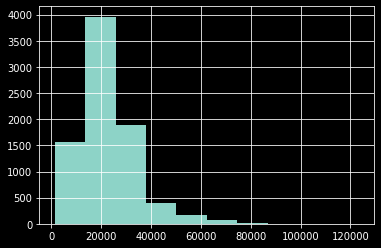

In [162]:
train['price'].hist()

In [163]:
train['price'].describe()

count      8085.000000
mean      22779.265925
std       11509.764250
min        1445.000000
25%       14880.000000
50%       20481.000000
75%       27980.000000
max      123456.000000
Name: price, dtype: float64

In [164]:
train.groupby('year')['price'].agg(['count','median'])

,count,median
year,,
1996,1,5995.0
1997,1,3950.0
1998,1,3950.0
1999,3,3995.0
2000,2,1624.5
2001,2,4500.0
2002,3,2990.0
2003,2,9222.5
2004,9,3990.0


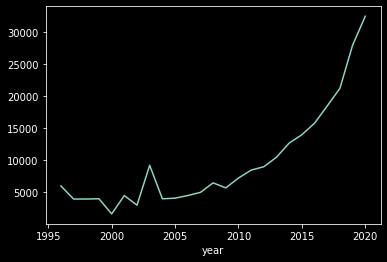

In [165]:
train.groupby('year')['price'].median().plot()

## Baseline

In [166]:
train['price'].mean()

22779.26592455164

In [167]:
train['price_pred_mean'] = train['price'].mean()

In [168]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean
2857,3 Series,2017,12791,Manual,37676,Diesel,30,64.2,2.0,22779.265925
8851,3 Series,2016,10000,Automatic,84878,Diesel,0,74.3,2.0,22779.265925
6568,1 Series,2017,19990,Automatic,24092,Petrol,145,39.8,3.0,22779.265925
5508,M4,2019,47995,Automatic,999,Petrol,145,34.0,3.0,22779.265925
4600,5 Series,2013,8997,Manual,82949,Diesel,30,62.8,2.0,22779.265925
...,...,...,...,...,...,...,...,...,...,...
2895,1 Series,2020,21450,Manual,1905,Petrol,145,44.1,1.5,22779.265925
7813,5 Series,2020,34550,Automatic,110,Diesel,145,44.8,2.0,22779.265925
905,1 Series,2016,15498,Manual,20233,Diesel,30,62.8,2.0,22779.265925
5192,X1,2017,18990,Semi-Auto,32420,Diesel,145,55.4,2.0,22779.265925


In [169]:
train['err'] = train['price_pred_mean'] - train['price']

In [170]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err
2857,3 Series,2017,12791,Manual,37676,Diesel,30,64.2,2.0,22779.265925,9988.265925
8851,3 Series,2016,10000,Automatic,84878,Diesel,0,74.3,2.0,22779.265925,12779.265925
6568,1 Series,2017,19990,Automatic,24092,Petrol,145,39.8,3.0,22779.265925,2789.265925
5508,M4,2019,47995,Automatic,999,Petrol,145,34.0,3.0,22779.265925,-25215.734075
4600,5 Series,2013,8997,Manual,82949,Diesel,30,62.8,2.0,22779.265925,13782.265925


In [171]:
train['err_abs'] = abs(train['err'])

In [172]:
train['err_abs'].mean()

8510.678441221882

In [173]:
train['err_abs_prcnt']=train['err_abs']/train['price']

In [174]:
train['err_abs_prcnt'].mean()

0.48605499819608056

In [175]:
train['price_pred_median'] = train['price'].median()

Есть готовые команды для подсчета подобного плана в sklearn

In [176]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [177]:
mean_absolute_error(train['price'],train['price_pred_median'])

8292.698082869512

In [178]:
mean_absolute_percentage_error(train['price'],train['price_pred_median'])

0.42777442697835455

In [179]:
mean_absolute_error(train['price'],train['price_pred_mean'])

8510.678441221882

In [180]:
mean_absolute_percentage_error(train['price'],train['price_pred_mean'])

0.48605499819608056

In [181]:
test['price_pred_median'] =  train['price'].median()

In [182]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median
3840,X5,2017,35470,Automatic,47717,Diesel,235,42.8,3.0,20481.0
7757,5 Series,2015,15490,Automatic,45000,Diesel,160,51.4,3.0,20481.0
10325,i3,2016,17000,Automatic,41063,Other,0,470.8,0.6,20481.0
685,1 Series,2015,10991,Semi-Auto,45000,Diesel,20,72.4,1.5,20481.0
1947,X1,2017,21050,Semi-Auto,18099,Diesel,145,57.6,2.0,20481.0


In [183]:
mean_absolute_error(test['price'],test['price_pred_median'])

7981.071958456973

In [184]:
mean_absolute_percentage_error(test['price'],test['price_pred_median'])

0.41457308936224907

## Алгоритм на основе года

In [185]:
train.groupby('year')['price'].agg(['count','median','mean'])

,count,median,mean
year,,,
1996,1,5995.0,5995.000000
1997,1,3950.0,3950.000000
1998,1,3950.0,3950.000000
1999,3,3995.0,3980.000000
2000,2,1624.5,1624.500000
2001,2,4500.0,4500.000000
2002,3,2990.0,3858.333333
2003,2,9222.5,9222.500000
2004,9,3990.0,8429.222222


In [186]:
model_year_mean = train.groupby('year')['price'].mean().reset_index()

In [187]:
model_year_mean = model_year_mean.rename(columns = {"price":"price_pred"})

In [188]:
model_year_mean

,year,price_pred
0,1996,5995.000000
1,1997,3950.000000
2,1998,3950.000000
3,1999,3980.000000
4,2000,1624.500000
5,2001,4500.000000
6,2002,3858.333333
7,2003,9222.500000
8,2004,8429.222222
9,2005,3916.000000


In [189]:
train = train.merge(model_year_mean, how = 'left', on = 'year')
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_prcnt,price_pred_median,price_pred
0,3 Series,2017,12791,Manual,37676,Diesel,30,64.2,2.0,22779.265925,9988.265925,9988.265925,0.780882,20481.0,19353.891371
1,3 Series,2016,10000,Automatic,84878,Diesel,0,74.3,2.0,22779.265925,12779.265925,12779.265925,1.277927,20481.0,16662.035894
2,1 Series,2017,19990,Automatic,24092,Petrol,145,39.8,3.0,22779.265925,2789.265925,2789.265925,0.139533,20481.0,19353.891371
3,M4,2019,47995,Automatic,999,Petrol,145,34.0,3.0,22779.265925,-25215.734075,25215.734075,0.525383,20481.0,31151.458317
4,5 Series,2013,8997,Manual,82949,Diesel,30,62.8,2.0,22779.265925,13782.265925,13782.265925,1.531874,20481.0,11085.583916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,1 Series,2020,21450,Manual,1905,Petrol,145,44.1,1.5,22779.265925,1329.265925,1329.265925,0.061970,20481.0,35437.428309
8081,5 Series,2020,34550,Automatic,110,Diesel,145,44.8,2.0,22779.265925,-11770.734075,11770.734075,0.340687,20481.0,35437.428309
8082,1 Series,2016,15498,Manual,20233,Diesel,30,62.8,2.0,22779.265925,7281.265925,7281.265925,0.469820,20481.0,16662.035894
8083,X1,2017,18990,Semi-Auto,32420,Diesel,145,55.4,2.0,22779.265925,3789.265925,3789.265925,0.199540,20481.0,19353.891371


In [190]:
mean_absolute_error(train['price'],train['price_pred'])

5506.964950421222

In [191]:
mean_absolute_percentage_error(train['price'],train['price_pred'])

0.24585616207809421

In [192]:
test = test.merge(model_year_mean, how = 'left', on = 'year')

In [193]:
test.isna().mean()

model                0.0
year                 0.0
price                0.0
transmission         0.0
mileage              0.0
fuelType             0.0
tax                  0.0
mpg                  0.0
engineSize           0.0
price_pred_median    0.0
price_pred           0.0
dtype: float64

Проверяем на тестовой табличке

In [194]:
mean_absolute_error(test['price'],test['price_pred'])

5428.394151011903

In [195]:
mean_absolute_percentage_error(test['price'],test['price_pred'])

0.2467942407991819

## Медиана по году

In [201]:
model_year_median = train.groupby('year')['price'].median().reset_index()

In [202]:
model_year_median = model_year_median.rename(columns = {"price":"price_pred_median"})

In [203]:
model_year_median

,year,price_pred_median
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3995.0
4,2000,1624.5
5,2001,4500.0
6,2002,2990.0
7,2003,9222.5
8,2004,3990.0
9,2005,4085.0


In [204]:
train = train.merge(model_year_median, how = 'left', on = 'year')
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_prcnt,price_pred_median_x,price_pred,price_pred_median_y,price_pred_median
0,3 Series,2017,12791,Manual,37676,Diesel,30,64.2,2.0,22779.265925,9988.265925,9988.265925,0.780882,20481.0,19353.891371,18499.0,18499.0
1,3 Series,2016,10000,Automatic,84878,Diesel,0,74.3,2.0,22779.265925,12779.265925,12779.265925,1.277927,20481.0,16662.035894,15799.0,15799.0
2,1 Series,2017,19990,Automatic,24092,Petrol,145,39.8,3.0,22779.265925,2789.265925,2789.265925,0.139533,20481.0,19353.891371,18499.0,18499.0
3,M4,2019,47995,Automatic,999,Petrol,145,34.0,3.0,22779.265925,-25215.734075,25215.734075,0.525383,20481.0,31151.458317,27995.0,27995.0
4,5 Series,2013,8997,Manual,82949,Diesel,30,62.8,2.0,22779.265925,13782.265925,13782.265925,1.531874,20481.0,11085.583916,10490.0,10490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,1 Series,2020,21450,Manual,1905,Petrol,145,44.1,1.5,22779.265925,1329.265925,1329.265925,0.061970,20481.0,35437.428309,32517.5,32517.5
8081,5 Series,2020,34550,Automatic,110,Diesel,145,44.8,2.0,22779.265925,-11770.734075,11770.734075,0.340687,20481.0,35437.428309,32517.5,32517.5
8082,1 Series,2016,15498,Manual,20233,Diesel,30,62.8,2.0,22779.265925,7281.265925,7281.265925,0.469820,20481.0,16662.035894,15799.0,15799.0
8083,X1,2017,18990,Semi-Auto,32420,Diesel,145,55.4,2.0,22779.265925,3789.265925,3789.265925,0.199540,20481.0,19353.891371,18499.0,18499.0


In [205]:
mean_absolute_error(train['price'], train['price_pred_median'])

5270.83599257885

In [206]:
mean_absolute_percentage_error(train['price'],train['price_pred_median'])

0.2179618053567966

In [207]:
test = test.merge(model_year_median, how = 'left', on = 'year')
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median_x,price_pred,price_pred_median_y
0,X5,2017,35470,Automatic,47717,Diesel,235,42.8,3.0,20481.0,19353.891371,18499.0
1,5 Series,2015,15490,Automatic,45000,Diesel,160,51.4,3.0,20481.0,15261.793651,14000.0
2,i3,2016,17000,Automatic,41063,Other,0,470.8,0.6,20481.0,16662.035894,15799.0
3,1 Series,2015,10991,Semi-Auto,45000,Diesel,20,72.4,1.5,20481.0,15261.793651,14000.0
4,X1,2017,21050,Semi-Auto,18099,Diesel,145,57.6,2.0,20481.0,19353.891371,18499.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2691,5 Series,2018,23998,Semi-Auto,14052,Diesel,145,62.8,2.0,20481.0,22798.508943,21250.0
2692,X3,2020,35995,Semi-Auto,102,Diesel,145,54.3,2.0,20481.0,35437.428309,32517.5
2693,1 Series,2020,27950,Semi-Auto,100,Diesel,145,51.4,2.0,20481.0,35437.428309,32517.5
2694,X1,2015,15881,Semi-Auto,21992,Diesel,160,52.3,2.0,20481.0,15261.793651,14000.0


In [208]:
test.isna().mean()

model                  0.0
year                   0.0
price                  0.0
transmission           0.0
mileage                0.0
fuelType               0.0
tax                    0.0
mpg                    0.0
engineSize             0.0
price_pred_median_x    0.0
price_pred             0.0
price_pred_median_y    0.0
dtype: float64

In [210]:
mean_absolute_error(test['price'],test['price_pred_median_y'])

5122.790801186944

In [211]:
mean_absolute_percentage_error(test['price'],test['price_pred_median_y'])

0.21655868603440426

## Добавим еще одну переменную для улучшения модели

In [214]:
train.groupby('engineSize')['price'].agg(['count','mean','median'])

,count,mean,median
engineSize,,,
0.0,33,18849.878788,19000.0
0.6,4,17835.000000,18450.0
1.0,1,17400.000000,17400.0
1.5,1074,17264.887337,15980.5
1.6,93,9510.913978,9400.0
1.9,5,3968.000000,3950.0
2.0,4943,20690.108436,19721.0
2.2,4,6010.000000,3972.5
2.5,11,5443.818182,5200.0


Разобьем на 3 категории

In [215]:
def engine_group(x):
    if x <= 1.5:
        return '<=1.5'
    if x <= 2:
        return '<=2'
    return '>2'

In [216]:
train['engine_group'] = train['engineSize'].apply(engine_group)

In [218]:
t = train.groupby('engine_group')['price'].agg(['count','mean','median'])
t

,count,mean,median
engine_group,,,
<=1.5,1112,17314.096223,15993.0
<=2,5041,20467.280500,19490.0
>2,1932,31957.313147,27895.5


In [223]:
train['engine_group_2'] = pd.cut(train['engineSize'], [-float('inf'),1.5,2,float('inf')])

In [224]:
train.groupby('engine_group_2')['price'].agg(['count','mean','median'])

,count,mean,median
engine_group_2,,,
"(-inf, 1.5]",1112,17314.096223,15993.0
"(1.5, 2.0]",5041,20467.280500,19490.0
"(2.0, inf]",1932,31957.313147,27895.5


In [232]:
model_year_engine_median = train.groupby(['year','engine_group'])['price'].median().reset_index()
model_year_engine_median.head()

,year,engine_group,price
0,1996,>2,5995.0
1,1997,<=2,3950.0
2,1998,<=2,3950.0
3,1999,<=2,3995.0
4,2000,<=2,1699.0


In [233]:
train.groupby(['year','engine_group'])['price'].agg(['count','mean','median']).head()

,,count,mean,median
year,engine_group,,,
1996,>2,1,5995.0,5995.0
1997,<=2,1,3950.0,3950.0
1998,<=2,1,3950.0,3950.0
1999,<=2,3,3980.0,3995.0
2000,<=2,1,1699.0,1699.0


In [230]:
t = train.pivot_table(index='year', columns = 'engine_group', values = 'price', aggfunc = 'median')

In [229]:
import seaborn as sns

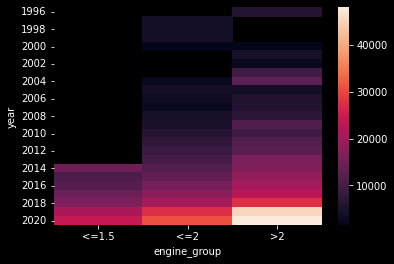

In [231]:
sns.heatmap(t)

Приджойним новую модель к трейну и тесту

In [237]:
model_year_engine_median = model_year_engine_median.rename(columns = {"price":"price_pred_year_engine_median"})
model_year_engine_median.head()

,year,engine_group,price_pred_year_engine_median
0,1996,>2,5995.0
1,1997,<=2,3950.0
2,1998,<=2,3950.0
3,1999,<=2,3995.0
4,2000,<=2,1699.0


In [238]:
train = train.merge(model_year_engine_median, how = 'left', on = ['year','engine_group'])
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_prcnt,price_pred_median_x,price_pred,price_pred_median_y,price_pred_median,engine_group,engine_group_2,price_pred_year_engine_median
0,3 Series,2017,12791,Manual,37676,Diesel,30,64.2,2.0,22779.265925,9988.265925,9988.265925,0.780882,20481.0,19353.891371,18499.0,18499.0,<=2,"(1.5, 2.0]",17600.0
1,3 Series,2016,10000,Automatic,84878,Diesel,0,74.3,2.0,22779.265925,12779.265925,12779.265925,1.277927,20481.0,16662.035894,15799.0,15799.0,<=2,"(1.5, 2.0]",15500.0
2,1 Series,2017,19990,Automatic,24092,Petrol,145,39.8,3.0,22779.265925,2789.265925,2789.265925,0.139533,20481.0,19353.891371,18499.0,18499.0,>2,"(2.0, inf]",22674.0
3,M4,2019,47995,Automatic,999,Petrol,145,34.0,3.0,22779.265925,-25215.734075,25215.734075,0.525383,20481.0,31151.458317,27995.0,27995.0,>2,"(2.0, inf]",45323.0
4,5 Series,2013,8997,Manual,82949,Diesel,30,62.8,2.0,22779.265925,13782.265925,13782.265925,1.531874,20481.0,11085.583916,10490.0,10490.0,<=2,"(1.5, 2.0]",9999.0


Проверяем качество

In [239]:
mean_absolute_error(train['price'], train['price_pred_year_engine_median'])

3707.6066790352506

In [240]:
mean_absolute_percentage_error(train['price'],train['price_pred_year_engine_median'])

0.15989095629878447

In [243]:
test['engine_group'] = test['engineSize'].apply(engine_group)
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median_x,price_pred,price_pred_median_y,engine_group
0,X5,2017,35470,Automatic,47717,Diesel,235,42.8,3.0,20481.0,19353.891371,18499.0,>2
1,5 Series,2015,15490,Automatic,45000,Diesel,160,51.4,3.0,20481.0,15261.793651,14000.0,>2
2,i3,2016,17000,Automatic,41063,Other,0,470.8,0.6,20481.0,16662.035894,15799.0,<=1.5
3,1 Series,2015,10991,Semi-Auto,45000,Diesel,20,72.4,1.5,20481.0,15261.793651,14000.0,<=1.5
4,X1,2017,21050,Semi-Auto,18099,Diesel,145,57.6,2.0,20481.0,19353.891371,18499.0,<=2


In [244]:
test = test.merge(model_year_engine_median, how = 'left', on = ['year','engine_group'])
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median_x,price_pred,price_pred_median_y,engine_group,price_pred_year_engine_median
0,X5,2017,35470,Automatic,47717,Diesel,235,42.8,3.0,20481.0,19353.891371,18499.0,>2,22674.0
1,5 Series,2015,15490,Automatic,45000,Diesel,160,51.4,3.0,20481.0,15261.793651,14000.0,>2,18907.0
2,i3,2016,17000,Automatic,41063,Other,0,470.8,0.6,20481.0,16662.035894,15799.0,<=1.5,11899.0
3,1 Series,2015,10991,Semi-Auto,45000,Diesel,20,72.4,1.5,20481.0,15261.793651,14000.0,<=1.5,10924.5
4,X1,2017,21050,Semi-Auto,18099,Diesel,145,57.6,2.0,20481.0,19353.891371,18499.0,<=2,17600.0


In [246]:
test.isna().mean()

model                            0.000000
year                             0.000000
price                            0.000000
transmission                     0.000000
mileage                          0.000000
fuelType                         0.000000
tax                              0.000000
mpg                              0.000000
engineSize                       0.000000
price_pred_median_x              0.000000
price_pred                       0.000000
price_pred_median_y              0.000000
engine_group                     0.000000
price_pred_year_engine_median    0.001113
dtype: float64

In [248]:
test[test['price_pred_year_engine_median'].isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median_x,price_pred,price_pred_median_y,engine_group,price_pred_year_engine_median
169,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,20481.0,3980.000000,3995.0,>2,NaN
374,1 Series,2001,13000,Manual,22633,Petrol,125,53.3,0.0,20481.0,4500.000000,4500.0,<=1.5,NaN
1479,3 Series,2002,3999,Automatic,85452,Petrol,330,33.6,2.0,20481.0,3858.333333,2990.0,<=2,NaN


In [249]:
def error(y_true,y_pred):
    print(mean_absolute_error(y_true,y_pred))
    print(mean_absolute_percentage_error(y_true,y_pred))

In [251]:
error(train['price'], train['price_pred_year_engine_median'])

3707.6066790352506
0.15989095629878447


In [253]:
test_no_nan = test.dropna().copy()

In [254]:
error(test_no_nan['price'], test_no_nan['price_pred_year_engine_median'])

3646.8770887486075
0.15989024109525873


## Улучшение модели